# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [5]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [6]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [7]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [8]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

df.isnull().sum()

In [9]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [11]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

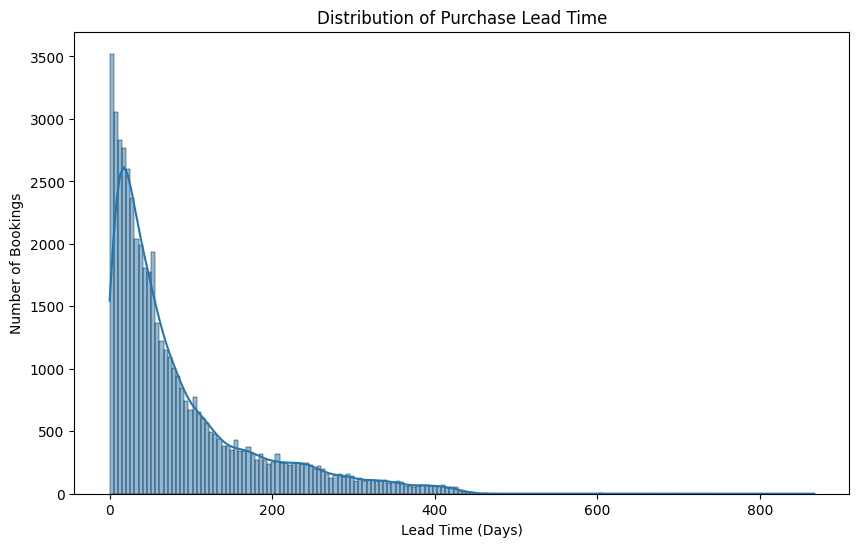

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# For a numerical column like 'purchase_lead' (how many days in advance the booking was made)
plt.figure(figsize=(10, 6)) # Make the plot a bit wider
sns.histplot(df['purchase_lead'], kde=True)
plt.title('Distribution of Purchase Lead Time') # Give it a meaningful title
plt.xlabel('Lead Time (Days)') # Label your x-axis
plt.ylabel('Number of Bookings') # Label your y-axis
plt.show()

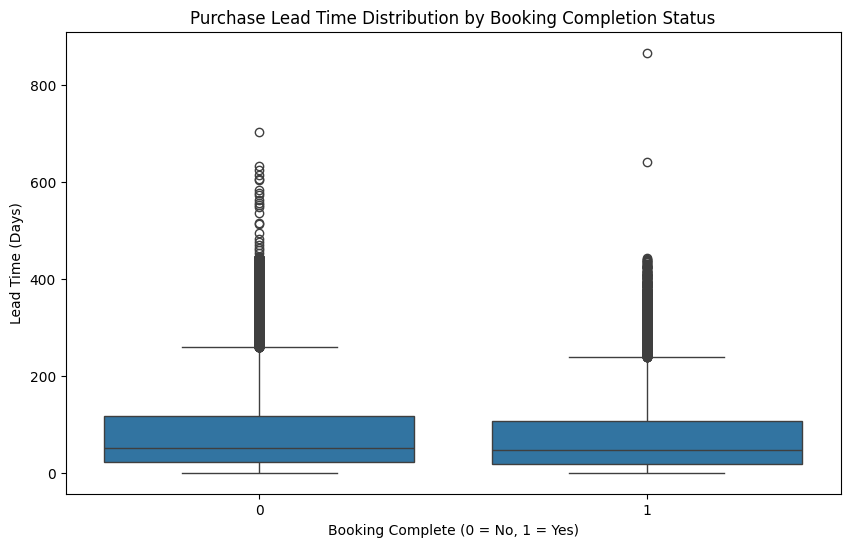

In [13]:
# Assuming 'booking_complete' is your target column (0 or 1)
plt.figure(figsize=(10, 6))
sns.boxplot(x='booking_complete', y='purchase_lead', data=df)
plt.title('Purchase Lead Time Distribution by Booking Completion Status')
plt.xlabel('Booking Complete (0 = No, 1 = Yes)') # Explain what 0 and 1 mean
plt.ylabel('Lead Time (Days)')
plt.show()

In [16]:
print(f"Number of rows before dropping duplicates: {len(df)}")
df.drop_duplicates(inplace=True)
print(f"Number of rows after dropping duplicates: {len(df)}")

Number of rows before dropping duplicates: 50000
Number of rows after dropping duplicates: 49281


In [17]:
# Convert to datetime format if it's not already
# (Skip this line if df.info() already shows it as datetime)
# df['booking_date'] = pd.to_datetime(df['booking_date'], errors='coerce')

# Extract useful components (e.g., month, day of week)
# df['Booking_Month'] = df['booking_date'].dt.month
# df['Booking_Day_of_Week'] = df['booking_date'].dt.dayofweek # Monday=0, Sunday=6
# df.drop('booking_date', axis=1, inplace=True) # You might drop the original date column if you've extracted all you need

In [18]:
X = df.drop('booking_complete', axis=1) # All columns EXCEPT 'booking_complete'
y = df['booking_complete']             # Only the 'booking_complete' column

In [19]:
# Identify categorical columns (excluding 'booking_complete' which is now 'y')
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply One-Hot Encoding
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [20]:
from sklearn.preprocessing import StandardScaler

# Re-identify numerical columns after one-hot encoding (they are now int64 or float64)
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [22]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
print(f"\nCross-validation ROC AUC Scores: {cv_scores}")
print(f"Mean CV ROC AUC: {np.mean(cv_scores):.4f}")

Accuracy: 0.8461
Precision: 0.4491
Recall: 0.1164
F1-Score: 0.1848
ROC AUC Score: 0.7672

Confusion Matrix:
 [[8168  211]
 [1306  172]]


NameError: name 'cross_val_score' is not defined

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score   # <-- Add this line
import numpy as np

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
print(f"\nCross-validation ROC AUC Scores: {cv_scores}")
print(f"Mean CV ROC AUC: {np.mean(cv_scores):.4f}")


Accuracy: 0.8461
Precision: 0.4491
Recall: 0.1164
F1-Score: 0.1848
ROC AUC Score: 0.7672

Confusion Matrix:
 [[8168  211]
 [1306  172]]

Cross-validation ROC AUC Scores: [0.6768639  0.4126353  0.26121934 0.32080141 0.72643136]
Mean CV ROC AUC: 0.4796


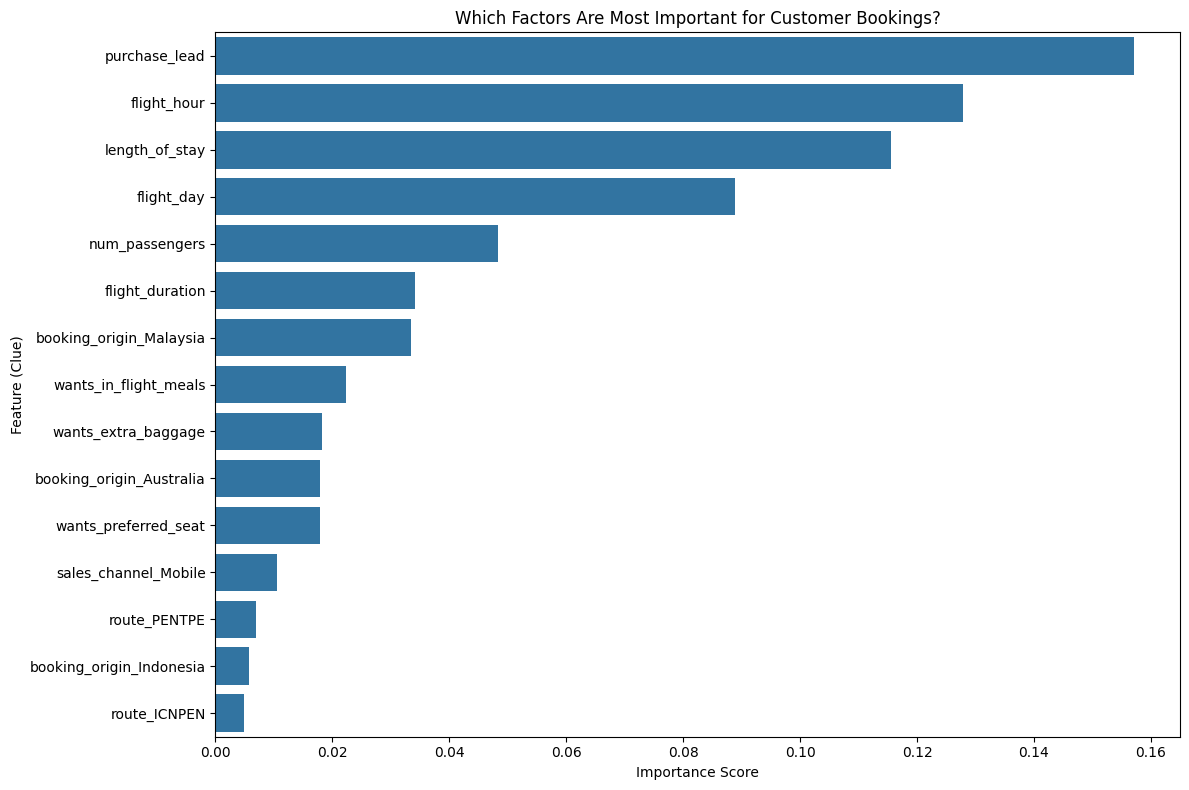

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(12, 8)) # Adjust figure size for potentially many features
sns.barplot(x=feature_importances.head(15), y=feature_importances.head(15).index) # Show top 15
plt.title('Which Factors Are Most Important for Customer Bookings?')
plt.xlabel('Importance Score')
plt.ylabel('Feature (Clue)')
plt.tight_layout()
plt.show()